In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn-v0_8')

In [24]:
df = pd.read_csv('/content/dataset/car data.csv')

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [26]:
df.shape

(301, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


# Data Preprocessing

In [30]:
df['Age'] = 2021 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [31]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [32]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)', 'Present_Price':'Present_Price(lacs)', 'Owner':'Past_Owners'}, inplace=True)

In [33]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [34]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

# Visualizing the data

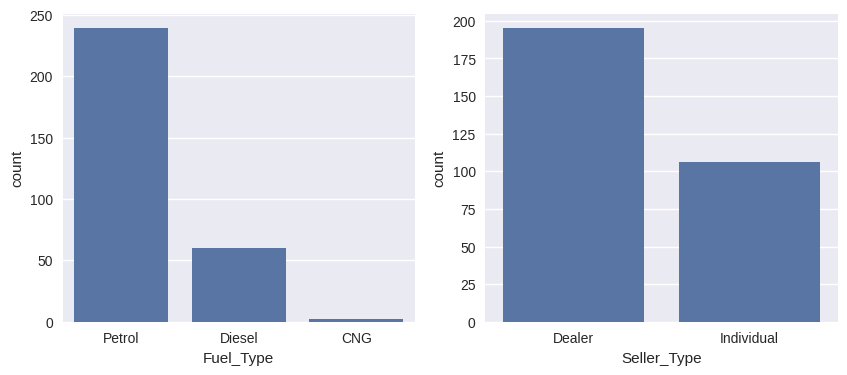

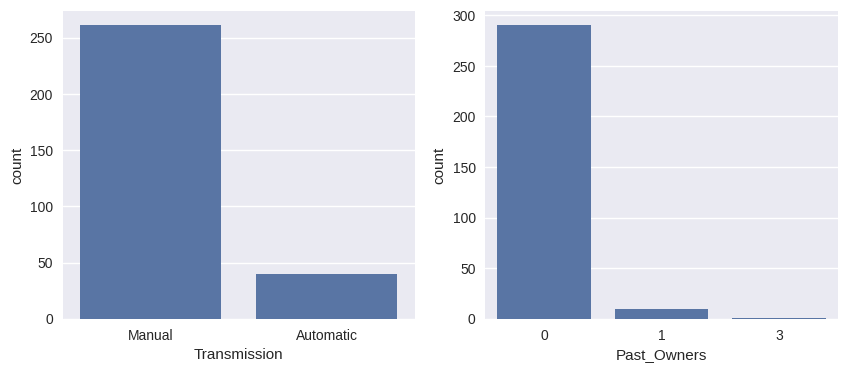

In [35]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i +=1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.show()

In [36]:
df[df['Present_Price(lacs)']>df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [37]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [38]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


In [39]:
sns.heatmap(df.corr(), annot = True, cmap='RdBu')
plt.show()

ValueError: could not convert string to float: 'ritz'

In [ ]:
df.corr()['Selling_Price(lacs)']

In [ ]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns='Fuel_Type')

In [40]:
# Creating dummies for categorical values
df.drop(labels='Car_Name', axis=1, inplace = True)


In [41]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [42]:
df = pd.get_dummies(data=df, drop_first=True)

In [43]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,False,True,False,True
1,4.75,9.54,43000,0,8,True,False,False,True
2,7.25,9.85,6900,0,4,False,True,False,True
3,2.85,4.15,5200,0,10,False,True,False,True
4,4.60,6.87,42450,0,7,True,False,False,True


# Train - Test - Split

In [44]:
# Train Test Split
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [45]:
print(X)

[[5.59 27000 0 ... True False True]
 [9.54 43000 0 ... False False True]
 [9.85 6900 0 ... True False True]
 ...
 [11.0 87934 0 ... True False True]
 [12.5 9000 0 ... False False True]
 [5.9 5464 0 ... True False True]]


In [46]:
# print(y)

In [47]:
print(X.shape, y.shape)

(301, 8) (301, 1)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Scaling the data for better training

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


In [51]:
print(y.shape, y_train.shape, y_test.shape)

(301, 1) (240, 1) (61, 1)


# Building Artifical Neural Network

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [160]:
model = Sequential()
model.add(Dense(64, activation='tanh', kernel_regularizer='l2'))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(10, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1))

In [163]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [164]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_lr])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 1.3460 - val_loss: 2.4844 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4209 - val_loss: 1.8869 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3461 - val_loss: 2.1805 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3565 - val_loss: 1.7612 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2831 - val_loss: 1.9803 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2717 - val_loss: 1.6776 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2522 - val_loss: 1.8392 - learning_rate: 0.0010
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2932 - val_loss: 1.9698 - learning_rate: 0.0010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3089 - val_loss: 1.5891 - learning_rate: 0.0010
Epoch 10/100
8/8 ━━━━━━━━━━━━

In [165]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,441 (208.76 KB)

 Trainable params: 17,813 (69.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,628 (139.18 KB)

In [166]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

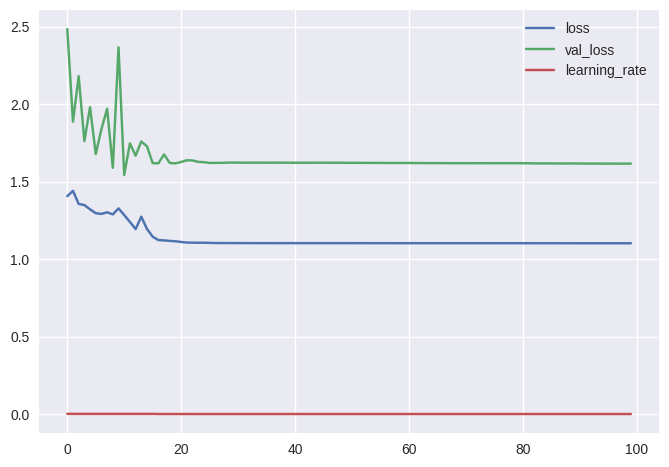

In [167]:
loss_df.plot()

# Model Evaluation

In [168]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4913 


1.615645408630371

## model.predict() on X_test

In [169]:
train_pred = model.predict(X_train)
# print(pred_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## model.predict()  on X_train

In [170]:
test_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [171]:
from sklearn.metrics import r2_score

- R Squared : R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [172]:
r2_train = r2_score(y_train, train_pred)
print("R Squared value of train dataL: ",r2_train)

R Squared value of train dataL:  0.9892728238166372


In [173]:
r2_test = r2_score(y_test, test_pred)
print("R Squared value of test data:", r2_test)

R Squared value of test data: 0.9630785137220188


In [174]:
diff_r2_scores = r2_train - r2_test

In [175]:
print("Difference between two scores: ", round(diff_r2_scores, 2))

Difference between two scores:  0.03
